In [2]:
import selenium
from selenium import webdriver
from urllib.parse import quote
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import string
import matplotlib.pyplot as plt
%matplotlib inline
import platform
from scipy.stats import *
from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':  # 맥OS 
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows': 
    # 윈도우   
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...  sorry~~~')

In [7]:
data = pd.read_csv('./final/(0423)진짜 최종.csv', index_col=0)

In [8]:
data

,산지,최종수량,year,month,day,1kg price,date2,temp
0,통영,254.0,2006,4,5,3200.00,2006.04.05,12.075
1,통영,535.2,2006,4,5,4000.00,2006.04.05,12.075
2,통영,70.0,2006,4,5,4285.71,2006.04.05,12.075
3,통영,194.7,2006,4,5,4454.55,2006.04.05,12.075
4,통영,493.0,2006,4,5,3941.18,2006.04.05,12.075
...,...,...,...,...,...,...,...,...
21381,삼천포,2.0,2021,4,2,3100.00,2021.04.02,13.150
21382,삼천포,3.6,2021,4,2,7833.33,2021.04.02,13.150
21383,삼천포,22.8,2021,4,5,6894.74,2021.04.05,13.325
21384,삼천포,30.0,2021,4,6,6700.00,2021.04.06,13.350


In [9]:
data_raw = data.copy()

In [12]:
data.columns= ['from','qty','year','month','day','1kg price','date2','temp']

In [13]:
group = data.groupby(['date2'])
grouped = group.agg({'qty':'sum','1kg price':'mean','temp':'mean'}).round(2)

In [10]:
grouped

,qty,1kg price,temp
date,,,
2006-04-04,978.3,4948.71,11.10
2006-04-05,4600.7,4657.56,11.59
2006-04-06,3842.2,4684.90,11.82
2006-04-07,4777.3,4175.11,11.99
2006-04-08,4773.5,4668.08,12.00
...,...,...,...
2021-04-03,561.4,4642.59,13.30
2021-04-05,421.1,6149.90,13.24
2021-04-06,290.7,7161.38,13.32


In [34]:
pd.set_option('display.max_row', 1029)

In [14]:
data[(data['temp'].isnull())]

,from,qty,year,month,day,1kg price,date2,temp


In [17]:
import seaborn as sns

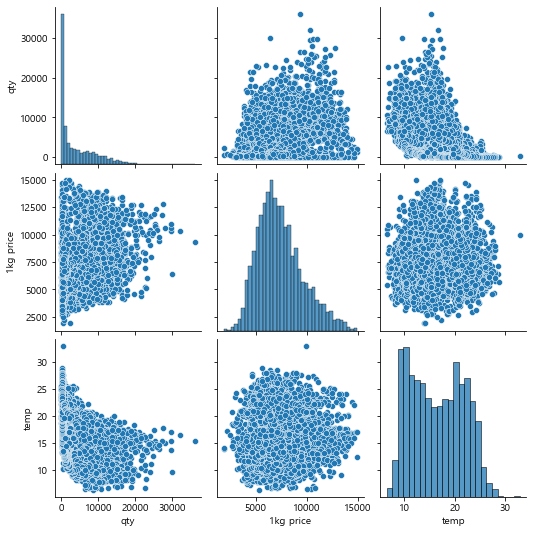

In [18]:
sns.pairplot(grouped[['qty','1kg price','temp']])

In [15]:
from sklearn.model_selection import train_test_split
x = grouped[['qty','temp']]
y = grouped['1kg price']

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2)

In [16]:
from sklearn.linear_model import LinearRegression
mlr = LinearRegression()
mlr.fit(x_train, y_train) 

LinearRegression()